---

**Trying to work formulate ideas on a summer data analytics project** 

*1). Using Prophet, as ARIMA is hard to get exactly correct and won't work necessarily well without further knowledge*

In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests 
import re 
from bs4 import BeautifulSoup
from prophet import Prophet 

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error


---

**Time series data has a few key components, notably: Trend, Seasonality, Cycle, and Variation**


In [49]:
url = 'https://google.com'
response = requests.get(url)
print(response.raise_for_status())
#None is a positive response

soup = BeautifulSoup(response.text, 'html.parser')
#Strain the text, setting the html parser
table_cells = soup.find_all('td', class_='ng-star-inserted')

# Extract and clean the data
data = [cell.get_text(strip=True) for cell in table_cells]

# Print the extracted data
print(data)


None
[]


**After trying it looks as if WUnderground uses JS to update these tables, so selenium is required**

In [50]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
#Wait for the presence of elements

#How to execute the search in the browser.
#
import time

service = Service(executable_path = r"C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe")
driver = webdriver.Chrome(service = service)

driver.get(url)
#opens our website with the driver, URL path specified
WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CLASS_NAME,"gLFyf"))
)
#After 5 seconds if element doesn't exist, crash the program

input_element = driver.find_element(By.CLASS_NAME, "gLFyf")
#Using the class name to identify the element, looks at first element on the page
#And then accesses it
input_element.clear()
#Clear out the input element
input_element.send_keys("Conway Farms GC" + Keys.ENTER)


WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, "Tournaments"))
)
link = driver.find_element(By.PARTIAL_LINK_TEXT, "Tournaments")
#find elements also exists, where we enter an array of text we want to find
link.click()

time.sleep(10)

driver.quit()

KeyboardInterrupt: 

In [ ]:
#Cookie clicker project

url1 = "https://orteil.dashnet.org/cookieclicker/"
service = Service(executable_path = r"C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe")
driver = webdriver.Chrome(service = service)
lang_id="langSelect-EN"
cookie_id="bigCookie"
count_id = "cookies"
product_price_prefix = "productPrice"
product_prefix = "product"

from selenium.common.exceptions import StaleElementReferenceException


driver.get(url1)

WebDriverWait(driver, 5).until(
     EC.presence_of_element_located((By.ID, lang_id))
)
#Wait 5 seconds until the Language Select Button appears

lang_link = driver.find_element(By.ID, lang_id)
lang_link.click()

WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.ID, cookie_id))
)
cookie = driver.find_element(By.ID, cookie_id)

while True:
    cookie = driver.find_element(By.ID, cookie_id)  # Fetch the cookie element again each time
    try:
        cookie.click()
    except StaleElementReferenceException:
        cookie = driver.find_element(By.ID, cookie_id)
        cookie.click()

    cookie_text = driver.find_element(By.ID, count_id).text
    cookies_count = cookie_text.split(" ")[0]
    cookies_count = int(cookies_count.replace("," , ""))

    if cookies_count >= 50:
        print(cookies_count)
    else:
        continue

    for i in range (4):
        product_price_element = driver.find_element(By.ID, product_price_prefix +str(i))
        product_price_text = product_price_element.text.replace("," , "")

        if product_price_text.isdigit():
            product_price = int(product_price_text)
            if cookies_count >= product_price:
                product = driver.find_element(By.ID, product_prefix + str(i))
                product.click()
                break

        else:
            driver.quit() #Normnally should be continue




50
50
50
51
50
50
50
51
50


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF60C8F3E32+31618]
	(No symbol) [0x00007FF60C86B099]
	(No symbol) [0x00007FF60C72888A]
	(No symbol) [0x00007FF60C6FDAE5]
	(No symbol) [0x00007FF60C7A45A7]
	(No symbol) [0x00007FF60C7BC131]
	(No symbol) [0x00007FF60C79CEB3]
	(No symbol) [0x00007FF60C76A46B]
	(No symbol) [0x00007FF60C76B001]
	GetHandleVerifier [0x00007FF60CBF9FFD+3202381]
	GetHandleVerifier [0x00007FF60CC46A1D+3516269]
	GetHandleVerifier [0x00007FF60CC3C490+3473888]
	GetHandleVerifier [0x00007FF60C9A5D36+760454]
	(No symbol) [0x00007FF60C876B3F]
	(No symbol) [0x00007FF60C871CD4]
	(No symbol) [0x00007FF60C871E62]
	(No symbol) [0x00007FF60C86120F]
	BaseThreadInitThunk [0x00007FFC6CF0257D+29]
	RtlUserThreadStart [0x00007FFC6DB0AF28+40]


In [ ]:
url2 = "https://www.ycombinator.com/companies"
service = Service(executable_path = r"C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe")

airbnbclass="_coName_86jzd_453"

options = webdriver.ChromeOptions()
options.add_argument("--headless")
#Chrome webdriver to run in headless mode
options.page_load_strategy = "none"
#Don't wait for all resources to donwload as this is dynamic JS
driver = webdriver.Chrome(service = service, options=options)

driver.get(url2)
#Get the YCombinator URL

WebDriverWait(driver, 5).until(
     EC.presence_of_element_located((By.CLASS_NAME, airbnbclass))
)

pages = 5
pages_delay = 5
for i in range(pages):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Scroll the document's body scroll height
    time.sleep(pages_delay)
    print(f"Page {i + 1} of {pages} loaded")
    #Print the page nunber 
boxes= driver.find_elements(By.CSS_SELECTOR, "a[class='_company_86jzd_338']")

companies = [
    ["Title" , "Address" , "Description"]
]

for element in boxes:
    title = element.find_element(By.CSS_SELECTOR, "span[class='_coName_86jzd_453']").text
    address = element.find_element(By.CSS_SELECTOR, "span[class='_coLocation_86jzd_469']").text
    description = element.find_element(By.CSS_SELECTOR, "span[class='_coDescription_86jzd_478']").text
    
    companies.append([title, address, description])

driver.close()

df = pd.DataFrame(companies[1:], columns = companies[0])
df.to_csv("ycombinator_companies.csv" , index= False)

Page 1 of 5 loaded
Page 2 of 5 loaded
Page 3 of 5 loaded
Page 4 of 5 loaded
Page 5 of 5 loaded


In [ ]:
df.head(5)

,Title,Address,Description
0,Airbnb,"San Francisco, CA, USA",Book accommodations around the world.
1,Amplitude,"San Francisco, CA, USA",Digital Analytics Platform
2,Coinbase,"San Francisco, CA, USA","Buy, sell, and manage cryptocurrencies."
3,DoorDash,"San Francisco, CA, USA",Restaurant delivery.
4,Dropbox,"San Francisco, CA, USA",Backup and share files in the cloud.


In [ ]:
df.iloc[135]

Title                                                Flip
Address                              Los Angeles, CA, USA
Description    Community-driven marketplace for sneakers.
Name: 135, dtype: object

In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#crunchurl = "https://www.crunchbase.com/home"

service = Service(executable_path = r"C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe")
optionscrunch = webdriver.ChromeOptions()
"""optionscrunch.add_argument("--headless")"""
optionscrunch.page_load_strategy = "normal"

driver = webdriver.Chrome(service=service, options = optionscrunch)
"""driver.get(crunchurl)

search_class ="ng-valid ng-dirty ng-touched"

WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.ID, search_class))
)

search_element = driver.find_elemenet((By.ID, search_class))
search_element.clear()
input_element.send_keys("Airbnb" + Keys.ENTER)"""

#New attempt using Chrome, then going to Crunchbase

google_url = "https://google.com"

driver.get(google_url)

googlesearch_class = "gLFyf" 
crunch_class="LC20lb MBeuO DKV0Md"

WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CLASS_NAME, googlesearch_class))
)
input_element = driver.find_element(By.CLASS_NAME, googlesearch_class)

input_element.clear()

input_element.send_keys("Crunchbase" + Keys.ENTER)

WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, crunch_class))
)
crunch_link = driver.find_element(By.CLASS_NAME, crunch_class)
crunch_link.click()

#Even after going through google, and then to crunchbase for a referral 
#Crunchbase stops Selenium

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF60C8F3E32+31618]
	(No symbol) [0x00007FF60C86B099]
	(No symbol) [0x00007FF60C72888A]
	(No symbol) [0x00007FF60C778524]
	(No symbol) [0x00007FF60C77862C]
	(No symbol) [0x00007FF60C7BF787]
	(No symbol) [0x00007FF60C79D14F]
	(No symbol) [0x00007FF60C7BCA80]
	(No symbol) [0x00007FF60C79CEB3]
	(No symbol) [0x00007FF60C76A46B]
	(No symbol) [0x00007FF60C76B001]
	GetHandleVerifier [0x00007FF60CBF9FFD+3202381]
	GetHandleVerifier [0x00007FF60CC46A1D+3516269]
	GetHandleVerifier [0x00007FF60CC3C490+3473888]
	GetHandleVerifier [0x00007FF60C9A5D36+760454]
	(No symbol) [0x00007FF60C876B3F]
	(No symbol) [0x00007FF60C871CD4]
	(No symbol) [0x00007FF60C871E62]
	(No symbol) [0x00007FF60C86120F]
	BaseThreadInitThunk [0x00007FFC6CF0257D+29]
	RtlUserThreadStart [0x00007FFC6DB0AF28+40]


***CRUNCHBASE HAS ANTI SCRAPING CAPTCHA's SO I WILL TRY PITCHBOOK***

In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

pitchbook_url = "https://pitchbook.com/profiles/company/51261-67"
service = Service(executable_path = r'C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe')
optionspitch = webdriver.ChromeOptions()
"""optionscrunch.add_argument("--headless")"""
optionspitch.page_load_strategy = "none"

driver = webdriver.Chrome(service=service, options = optionspitch)
driver.get(pitchbook_url)


pitch_search = "search-form__input"

WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CLASS_NAME, "search-form__input"))
)

search_element = driver.find_element(By.CLASS_NAME, "search-form__input")
search_element.clear()
search_element.send_keys("Airbnb" + Keys.ENTER)

#We are now viewing the result 
WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, "Airbnb"))
)
second_link = driver.find_element(By.PARTIAL_LINK_TEXT, "Airbnb")
second_link.click()

overview = [
    ["Founded Year" , "Status" , "Employees" , "Investments" , "Share Price"]
]
WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "li[title='2008']"))
)

founded_year = driver.find_element(By.CSS_SELECTOR, "p[class='XL-7 M-12 mb-xl-0']").text
status = driver.find_element(By.CSS_SELECTOR, "span[class='pp-overview-item__title font-weight-bold d-block-XL mb-xl-0']").text
print(status)




NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"p[class='XL-7 M-12 mb-xl-0']"}
  (Session info: chrome=126.0.6478.127); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF60C8F3E32+31618]
	(No symbol) [0x00007FF60C86B099]
	(No symbol) [0x00007FF60C72888A]
	(No symbol) [0x00007FF60C778524]
	(No symbol) [0x00007FF60C77862C]
	(No symbol) [0x00007FF60C7BF787]
	(No symbol) [0x00007FF60C79D14F]
	(No symbol) [0x00007FF60C7BCA80]
	(No symbol) [0x00007FF60C79CEB3]
	(No symbol) [0x00007FF60C76A46B]
	(No symbol) [0x00007FF60C76B001]
	GetHandleVerifier [0x00007FF60CBF9FFD+3202381]
	GetHandleVerifier [0x00007FF60CC46A1D+3516269]
	GetHandleVerifier [0x00007FF60CC3C490+3473888]
	GetHandleVerifier [0x00007FF60C9A5D36+760454]
	(No symbol) [0x00007FF60C876B3F]
	(No symbol) [0x00007FF60C871CD4]
	(No symbol) [0x00007FF60C871E62]
	(No symbol) [0x00007FF60C86120F]
	BaseThreadInitThunk [0x00007FFC6CF0257D+29]
	RtlUserThreadStart [0x00007FFC6DB0AF28+40]


In [ ]:
df.head(5)

,Title,Address,Description
0,Airbnb,"San Francisco, CA, USA",Book accommodations around the world.
1,Amplitude,"San Francisco, CA, USA",Digital Analytics Platform
2,Coinbase,"San Francisco, CA, USA","Buy, sell, and manage cryptocurrencies."
3,DoorDash,"San Francisco, CA, USA",Restaurant delivery.
4,Dropbox,"San Francisco, CA, USA",Backup and share files in the cloud.


In [ ]:
print(len(df.index))
print(df.dtypes)

140
Title          object
Address        object
Description    object
dtype: object


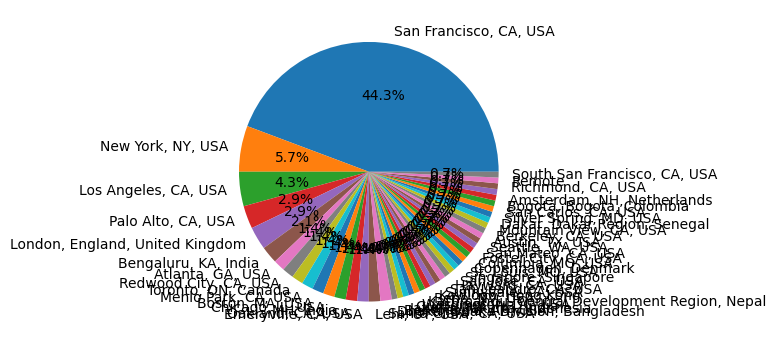

In [ ]:
df['Address'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
address_count = df['Address'].value_counts()
sufficient_count = address_count[address_count >=5].index
shortened_df = df[df['Address'].isin(sufficient_count)]
shortened_df

,Title,Address,Description
0,Airbnb,"San Francisco, CA, USA",Book accommodations around the world.
1,Amplitude,"San Francisco, CA, USA",Digital Analytics Platform
2,Coinbase,"San Francisco, CA, USA","Buy, sell, and manage cryptocurrencies."
3,DoorDash,"San Francisco, CA, USA",Restaurant delivery.
4,Dropbox,"San Francisco, CA, USA",Backup and share files in the cloud.
...,...,...,...
127,Lugg,"San Francisco, CA, USA","Move anything, anytime, anywhere"
128,Shasqi,"San Francisco, CA, USA",Pioneering Click Chemistry in Humans to change...
130,Spire Health,"San Francisco, CA, USA",Remote patient monitoring for lung disease pat...
133,Replika,"San Francisco, CA, USA",Replika is an AI friend that you can talk to d...


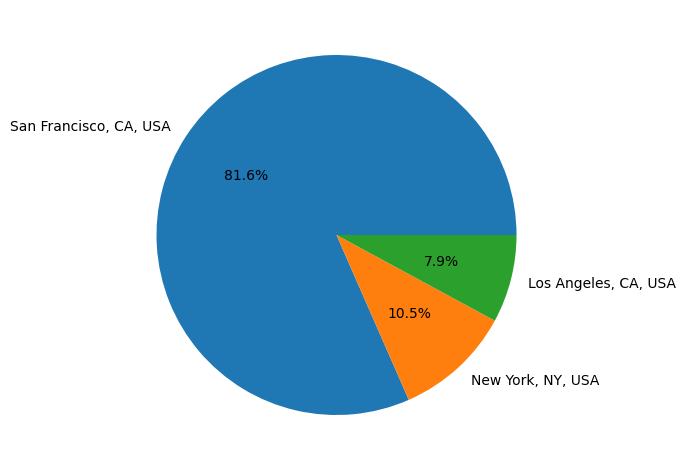

76


In [ ]:
shortened_df['Address'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()
print(len(shortened_df.index))

In [51]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time

chromedriver_path = r'C:\Users\adenm\Documents\GitHub\Intro-Sent-Analysis\chromedriver.exe'

service = Service(executable_path=chromedriver_path)
title_options = webdriver.ChromeOptions()
# title_options.add_argument("--headless")  # Uncomment to run in headless mode
title_options.page_load_strategy = "normal"

driver = webdriver.Chrome(service=service, options=title_options)

titlelist = shortened_df['Title'].tolist()
dealroom_url = "https://app.dealroom.co/dashboard"

data_for_df = [
    ["Enterprise Valuation" , "Num of Employees"]
]
valuation_css = "span[class='valuation__value']"
employee_css = "a[data-testid='internal']"


# Flag to check if the cookies button has been clicked
cookies_clicked = False

for title in titlelist:
    driver.get(dealroom_url)
    
    # Wait for the search input to be present
    dealroom_search = "react-autosuggest__input"
    WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.CLASS_NAME, dealroom_search))
    )
    
    # Perform search
    search_element = driver.find_element(By.CLASS_NAME, dealroom_search)
    search_element.clear()
    search_element.send_keys(title + Keys.ENTER)
    time.sleep(5)
    
    if not cookies_clicked:
        try:
            WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.ID, "cw-yes"))
            )
            cookie_click = driver.find_element(By.ID, "cw-yes")
            cookie_click.click()
            cookies_clicked = True
            print("Cookie has been clicked")
        except Exception as e:
            print("Cookie button not found or already clicked:", e)
    
    try:
        link = driver.find_element(By.CLASS_NAME, "search-item__wrapper")
        link.click()
        WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, valuation_css))
        )
        valuation = driver.find_element(By.CSS_SELECTOR, valuation_css).text
        num_of_employees = driver.find_element(By.CSS_SELECTOR, employee_css).text
        data_for_df.append([valuation, num_of_employees])
        print(valuation)
        print(num_of_employees)
    except Exception as e:
        print(f"Could not click search result for {title}: {e}")
    
# Close the WebDriver
driver.quit()


Cookie has been clicked
$85.7b

$752m

$59.7b

$43.1b

$7.8b



KeyboardInterrupt: 

**Now that I have a list of my YCombinator companies, shortened by address, I want to find more numerical data to add to my dataframe to finally do some actual data analysis upon it**